In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("..")  # Adjusts the path to include the parent directory

from rps_simulation.rps_base import RPS_core  
from rps_simulation.rps_multirun import RPS_multirun  
from rps_simulation.learning_curves import exponential_learning, logistic_learning
from rps_simulation.forgetting_curves import exponential_forgetting 
from rps_simulation.practice_rate import simple_linear_rate 
from rps_simulation.waiting_times import exponential_waiting_time 
from rps_simulation.dynamical_models import logistic_model, general_model
from rps_simulation.sensitivity_analysis import RPS_sensitivity # sensitivity analysis

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(10)


# 1. Logistic Learning Curve:
We use the **Basic RPS Model**. 

Default Parameters: $a = 0.2, b=5, \alpha=0.4, \beta=0.3 $
Also, initial conditions:  $S_0 = 0.1, \lambda_0 = 1$

## 1.1 Varying $a,b$:


In [2]:
# run model for different values of parameter a and b:
a_vals = np.round(np.linspace(0, 1, 21), 3)
b_vals = np.round(np.linspace(0, 10, 21), 3)

log_par_dict =  {'a': a_vals, 
                 'b': b_vals, 
                 'alpha': 0.4, 
                 'beta': 0.3, 
                 'S_0': 0.1}

log_sen = RPS_sensitivity(log_par_dict, learning='logistic', forgetting='exp', 
                          practice_rate='simple', waiting_time='exp')
df_log_pars = log_sen.df_par
log_sen.run_sensitivity_analysis(quit_thresh=0.1, n_sims=100, max_time=100)
df_log_sim = log_sen.df_sim


# Saving the sensitivity analysis data:
df_log_sim.to_csv('../data/RPS sims/log_sensitivity_a_b.csv')

### Parameter $a$:

**Distributions of Final Skills**

1. *par_vals* = *a_vals_filt*, contains the list of $a$ values for which the histogram is wanted. 
2. *par_others* is the dictionary containing a fixed value of $b$. This is kept fixed as $a$ is varied.
3. *plot_parms* is a dictionary which can be used to change plot parameters like alpha and bandwidth, along with providing a save location.

**Distributions of Total Practice-Events**

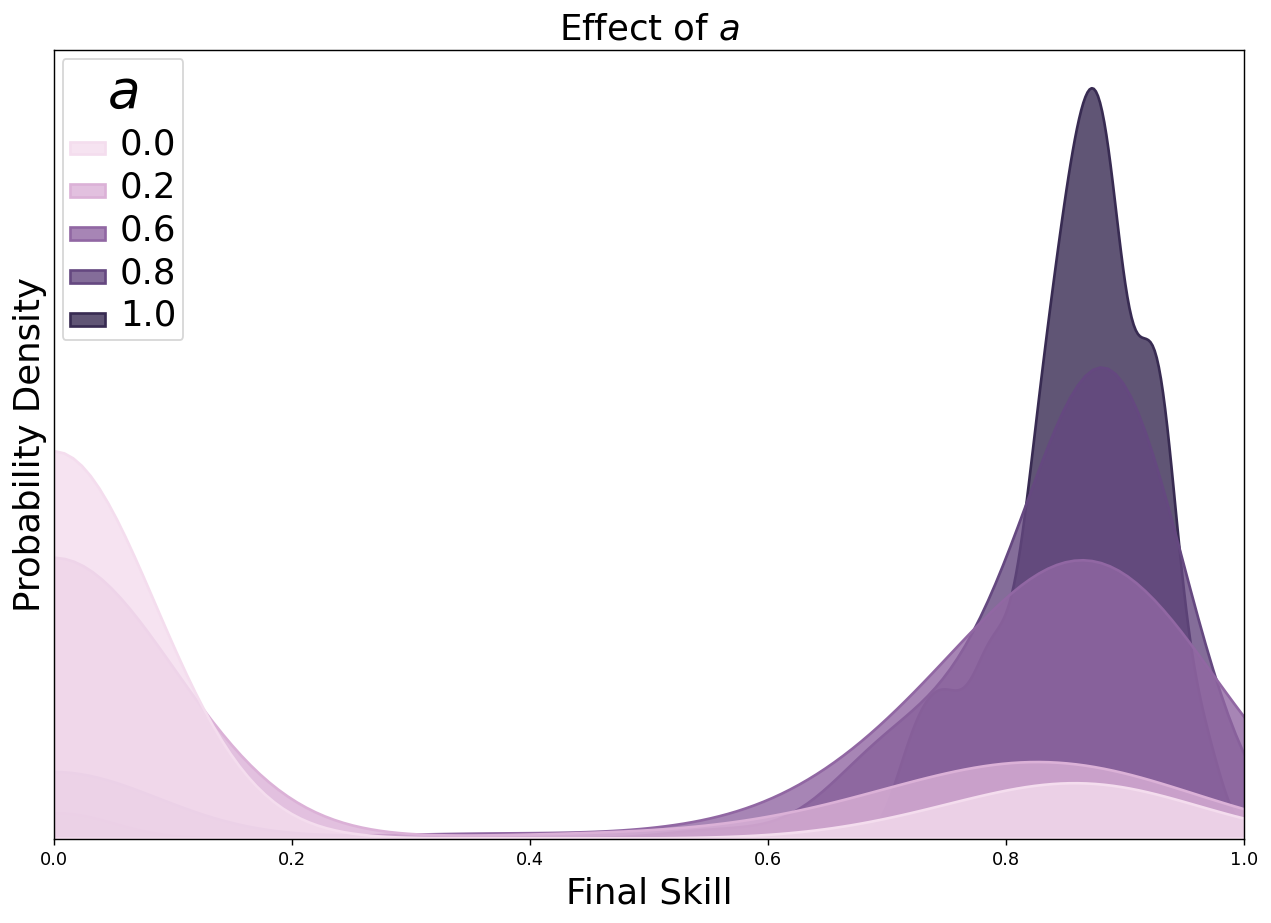

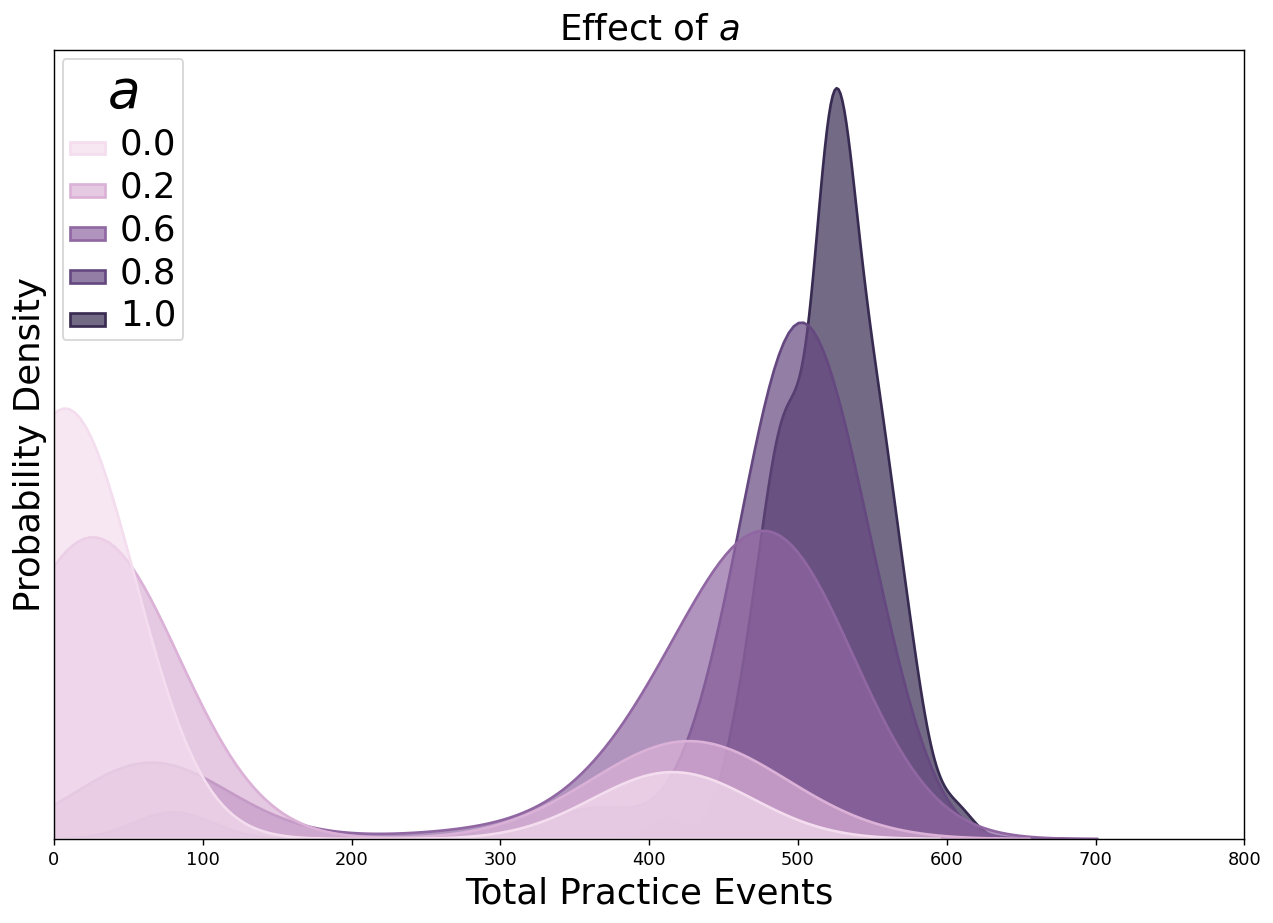

In [3]:
a_vals_filt = [0, 0.2, 0.6, 0.8, 1] # a-vals for which histogram is wanted
b_fixed = 5 # fixed b
log_sen.final_skill_histogram(param='a', par_vals=a_vals_filt,
                             par_others = {'b': 5},
                             plot_parms = {'legend_head_fs':30, 'legend_txt_fs':20,
                                           'legend_pos':'upper left', 'bw_adj': 0.7,
                                           'alpha':0.8, 
                                           'palette':sns.cubehelix_palette(start=3, rot=0.2, dark=0.2, 
                                                       light=.9, reverse=False, as_cmap=True),
                                           'common_norm':False, 
                                           'save_location': '../plots/sens_logistic_a_finalS_col.jpg'})


log_sen.practice_events_histogram(param='a', par_vals=a_vals_filt,
                                 par_others = {'b': 5},
                                 plot_parms = {'legend_head_fs':30, 'legend_txt_fs':20, 
                                               'legend_pos':'upper left','x_lim_max':800, 
                                               'bw_adj': 0.8, 'alpha':0.7,
                                               'palette':sns.cubehelix_palette(start=3, rot=0.2, dark=0.2, 
                                                            light=.9, reverse=False, as_cmap=True),
                                               'save_location': '../plots/sens_logistic_a_nprac_col.jpg'})

### Parameter $b$

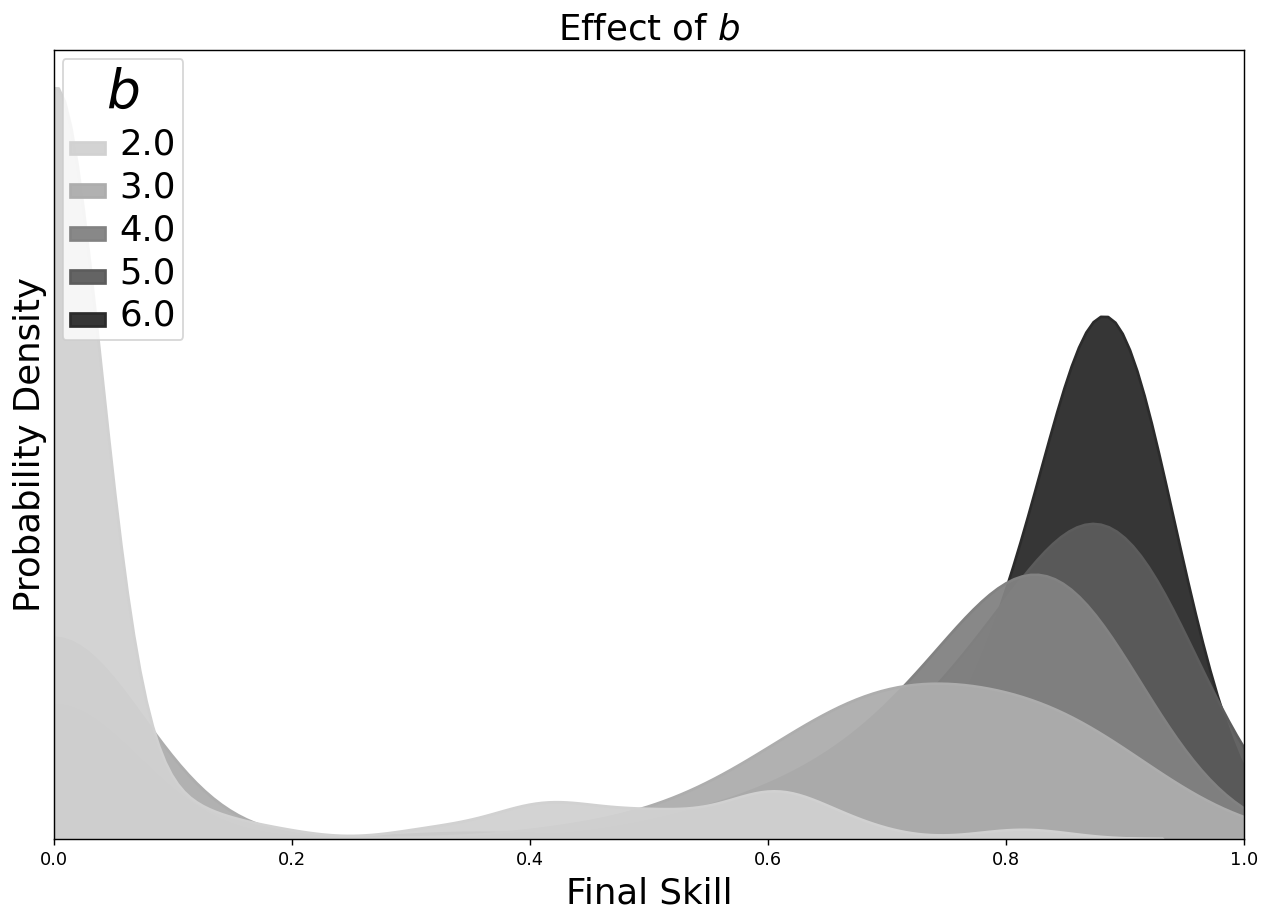

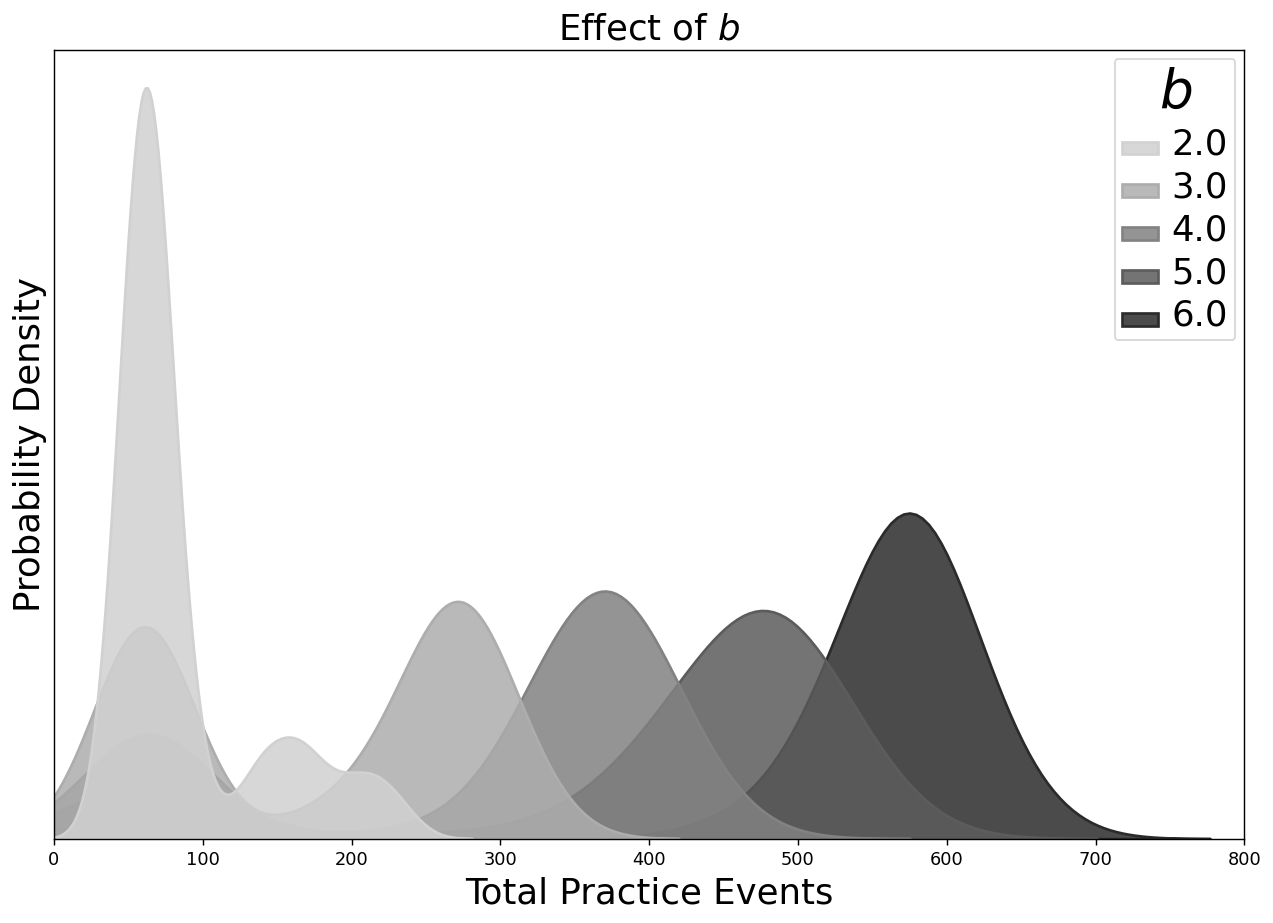

In [4]:
b_vals_filt = [2, 3, 4, 5, 6]
a_fixed = 0.6

log_sen.final_skill_histogram(param='b', par_vals=b_vals_filt,
                             par_others = {'a': a_fixed},
                             plot_parms = {'bw_adjust':.8, 'legend_head_fs':30, 'legend_txt_fs':20,
                                           'legend_pos':'upper left', 'save_location': '../plots/sens_logistic_b_finalS.jpg'}
                             )

log_sen.practice_events_histogram(param='b', par_vals=b_vals_filt,
                             par_others = {'a': a_fixed},
                             plot_parms = {'bw_adjust':.8, 'x_lim_max': 800, 'legend_head_fs':30, 'legend_txt_fs':20,
                                           'legend_pos':'upper right','save_location': '../plots/sens_logistic_b_nprac.jpg'}
                             )

### Heatmaps $a,b$:

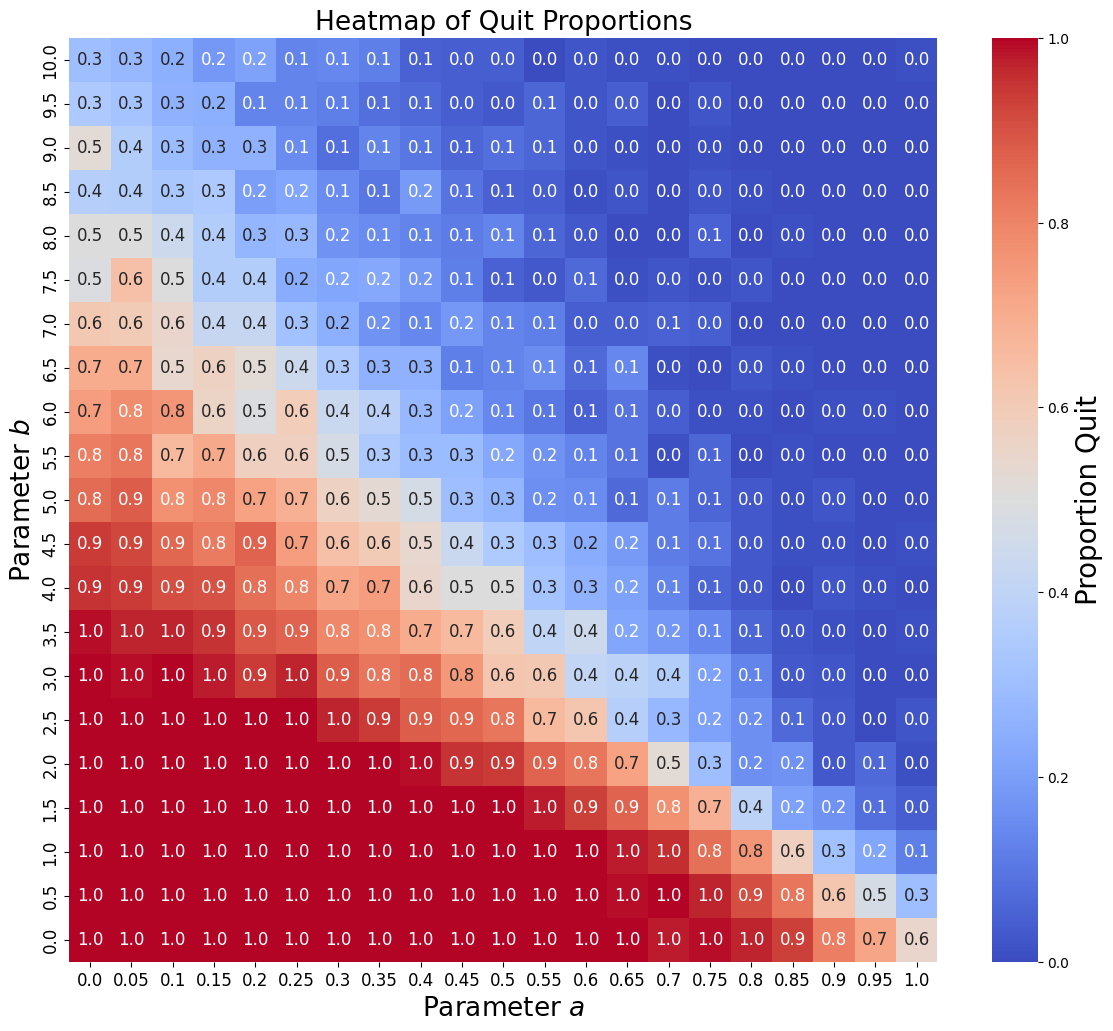

In [10]:
log_sen.heatmap(save_location='../plots/sens_log_heatmap_ab.jpg')

## 1.2 Varying Starting Skill $S_0$ 

In [11]:
# run model for different values of parameter a and b:
s0_vals = np.round(np.linspace(0.02, 0.12, 11), 3)

log_par_dict2 =  {'a': 0.6, 
                 'b': 5, 
                 'alpha': 0.4, 
                 'beta': 0.3, 
                 'S_0': s0_vals}

log_sen2 = RPS_sensitivity(log_par_dict2, learning='logistic', forgetting='exp', 
                          practice_rate='simple', waiting_time='exp')
df_log_pars2 = log_sen2.df_par
log_sen2.run_sensitivity_analysis(quit_thresh=0.1, n_sims=100, max_time=100)



In [12]:
df_log_sim2 = log_sen2.df_sim

# Saving Data:
df_log_sim2.to_csv('../data/RPS sims/log_sensitivity_s0.csv')

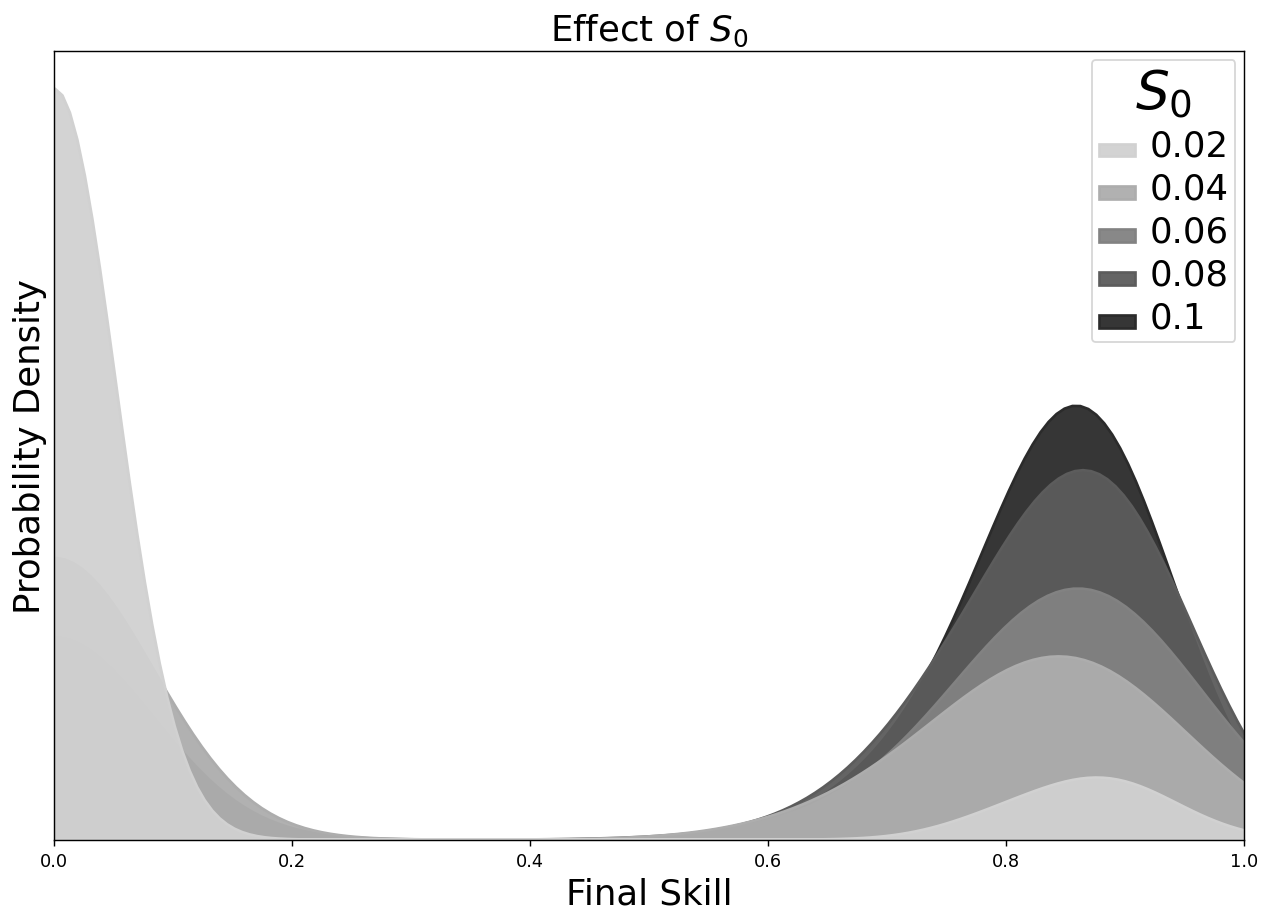

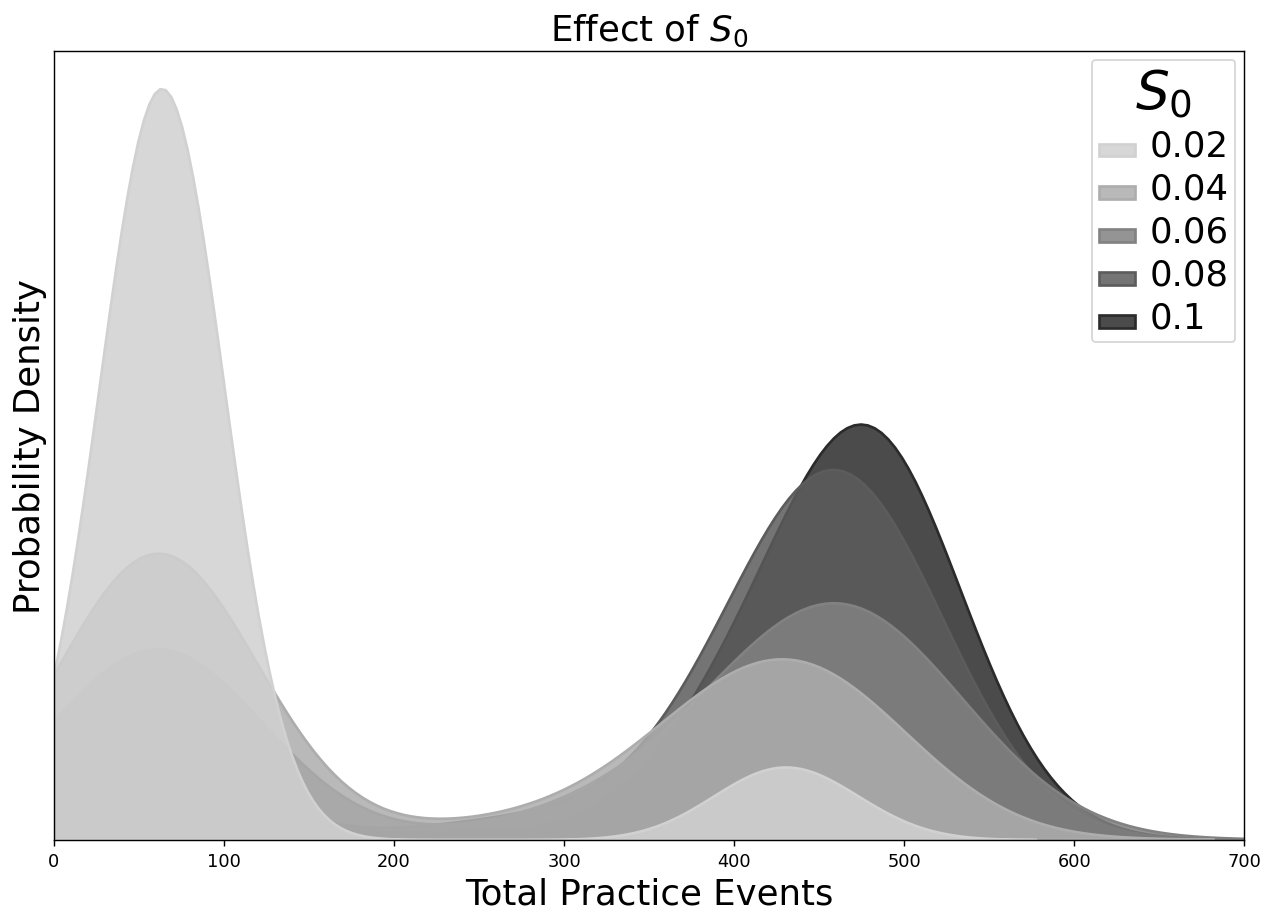

In [13]:
s0_vals_filt = [0.02 + i*0.02 for i in range(5)]
log_sen2.final_skill_histogram(param='S_0', par_vals=s0_vals_filt,
                             plot_parms = {'legend_head_fs':30, 'legend_txt_fs':20, 'legend_pos':'upper right',
                                           'bw_adjust':0.8, 'save_location': '../plots/sens_logistic_s0_finalS.jpg'}
                             )
log_sen2.practice_events_histogram(param='S_0', par_vals=s0_vals_filt,
                                 plot_parms = {'legend_head_fs':30, 'legend_txt_fs':20, 'bw_adjust':0.8, 
                                               'legend_pos':'upper right','x_lim_max':700,
                                           'save_location': '../plots/sens_logistic_s0_nprac.jpg'}
                                 )


## 1.3 Varying Parameters $\alpha,\beta$



In [14]:
# run model for different values of parameter a and b:
alpha_vals = np.round(np.linspace(0.0, 1, 21), 3)
beta_vals = np.round(np.linspace(0.0, 1, 21), 3)

log_par_dict3 =  {'alpha': alpha_vals, 
                 'beta': beta_vals, 
                 'a': 0.2, 
                 'b': 5, 
                 'S_0': 0.1}

log_sen_alp_bet = RPS_sensitivity(log_par_dict3, learning='logistic', forgetting='exp', 
                          practice_rate='simple', waiting_time='exp')
df_log_pars_alp_bet = log_sen_alp_bet.df_par
log_sen_alp_bet.run_sensitivity_analysis(quit_thresh=0.1, n_sims=100, max_time=100)
df_log_sim_alp_bet = log_sen_alp_bet.df_sim

# Saving Data:
df_log_sim_alp_bet.to_csv('../data/RPS sims/log_sensitivity_alpha_beta.csv')

### Parameter $\alpha$

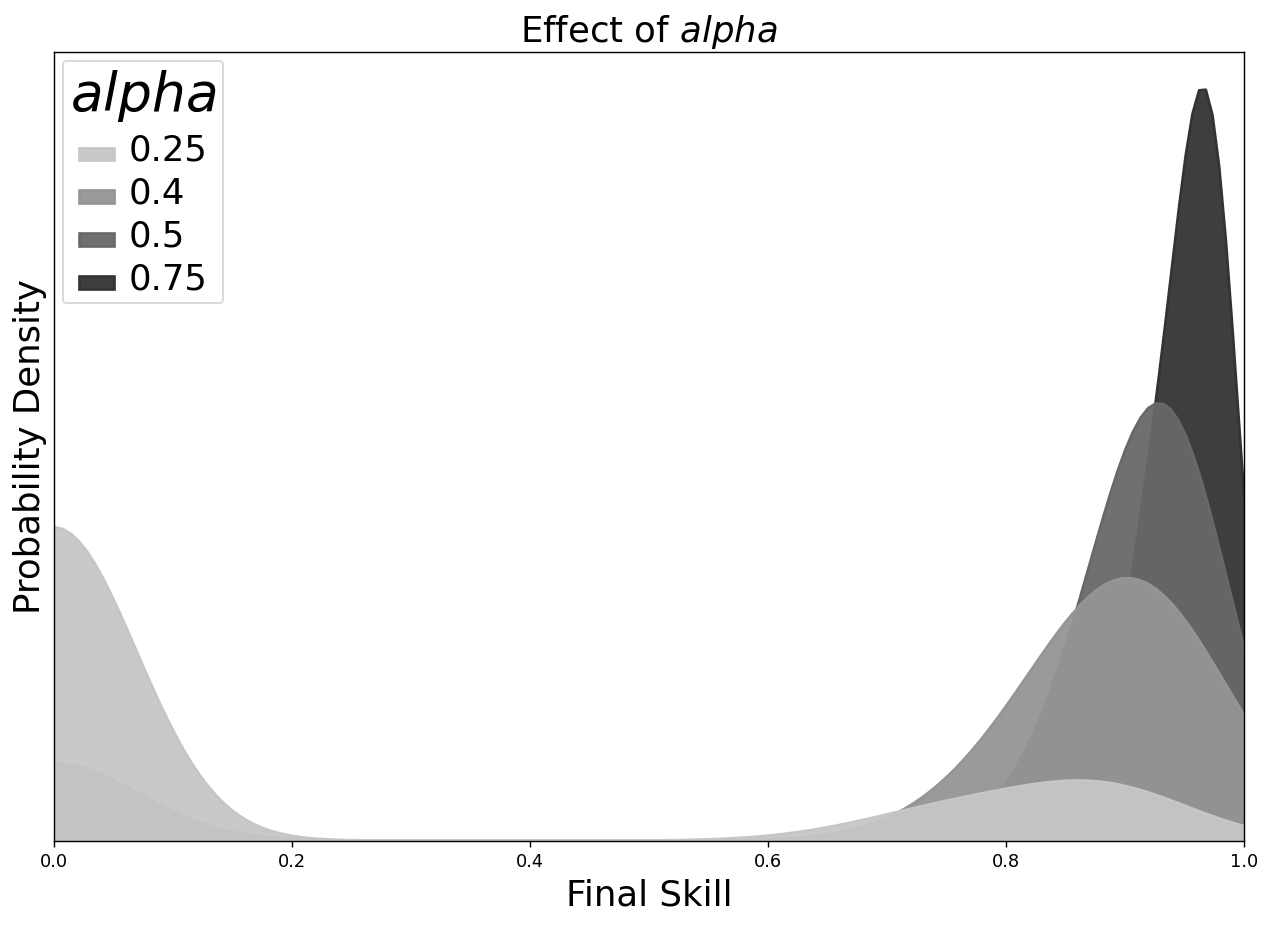

In [15]:
alpha_vals_filt = [0.25, 0.4, 0.5, 0.75] # varying alpha vals 
beta_fixed = 5 # fixed beta
log_sen_alp_bet.final_skill_histogram(param='alpha', par_vals=alpha_vals_filt,
                             par_others = {'beta': 0.2},
                             plot_parms = {'bw_adjust':1, 'legend_head_fs':30, 'legend_txt_fs':20, 
                                           'legend_pos':'upper left', 
                                           'palette': sns.color_palette("Greys", n_colors=5)[1:],
                                           'save_location': '../plots/sens_logistic_alpha_finalS.jpg'}
                             )
# log_sen_alp_bet.practice_events_histogram(param='alpha', par_vals=alpha_vals_filt,
#                                  par_others = {'beta': 5},
#                                  plot_parms = {'legend_head_fs':30, 'legend_txt_fs':20, 
#                                                'legend_pos':'upper left','x_lim_max':800,
#                                            'save_location': '../plots/sens_logistic_alpha_nprac.png'}
#                                  )

### Heatmap $\alpha, \beta$

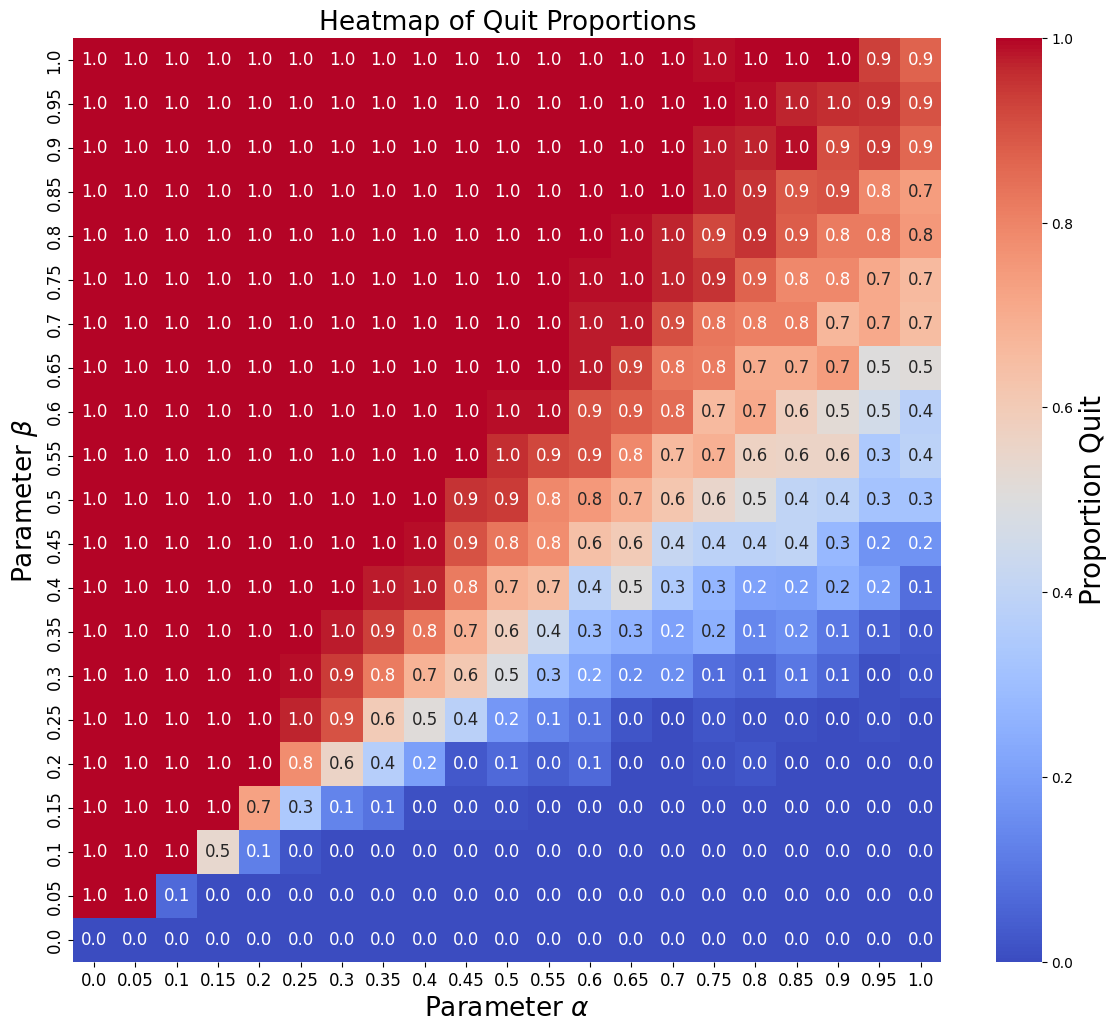

In [16]:
log_sen_alp_bet.heatmap(save_location='../plots/sens_log_heatmap_alp_bet.jpg', 
                        param_x = 'alpha', 
                        param_y='beta')

# 2. Exponential Learning Curve (Concacve):
Default Parameters: $a = 0.2, b=5, \alpha=0.2, \beta=0.3$

Also, initial conditions:  $S_0 = 0.1, \lambda_0 = 1$


In [17]:
# run model for different values of parameter a and b:
a_vals = np.round(np.linspace(0, 1, 21), 3)
b_vals = np.round(np.linspace(0, 10, 21), 3)

exp_par_dict =  {'a': a_vals, 
                 'b': b_vals, 
                 'alpha': 0.2, 
                 'beta': 0.3, 
                 'S_0': 0.1}

exp_sen = RPS_sensitivity(exp_par_dict, learning='exponential', forgetting='exp', 
                          practice_rate='simple', waiting_time='exp')
df_exp_pars = exp_sen.df_par
exp_sen.run_sensitivity_analysis(quit_thresh=0.1, n_sims=50, max_time=100)
df_exp_sim = exp_sen.df_sim

# Saving data:
df_exp_sim.to_csv('../data/RPS sims/exp_sensitivity_a_b.csv')


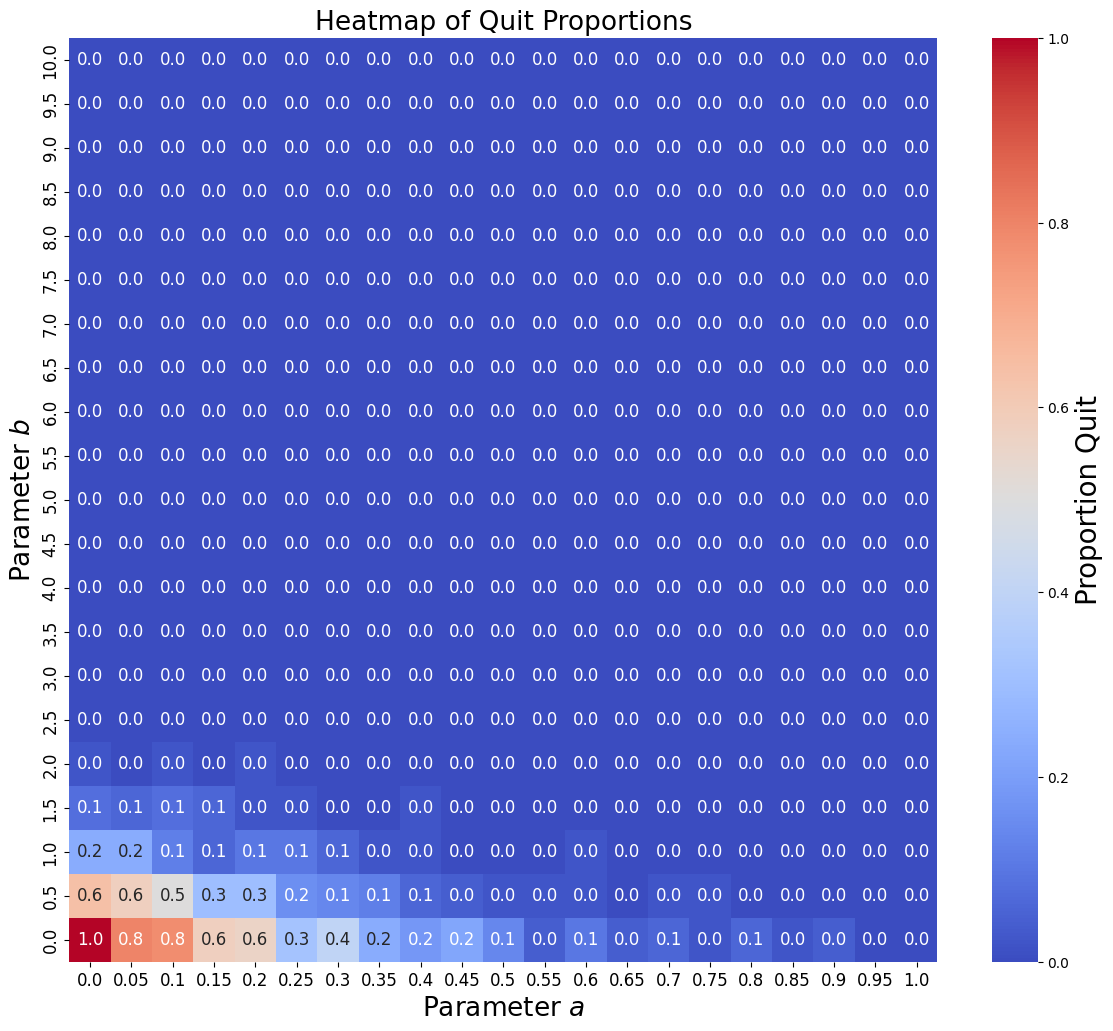

In [18]:
exp_sen.heatmap(save_location='../plots/sens_exp_heatmap_ab.jpg')

In [19]:
df_log_sim.head(10)

,a,b,alpha,beta,S_0,final_skills,n_prac,prop_quit
0,0.0,0.0,0.4,0.3,0.1,1.286024e-14,1,1.0
1,0.0,0.0,0.4,0.3,0.1,1.282373e-14,1,1.0
2,0.0,0.0,0.4,0.3,0.1,1.279637e-14,1,1.0
3,0.0,0.0,0.4,0.3,0.1,1.275035e-14,1,1.0
4,0.0,0.0,0.4,0.3,0.1,1.274660e-14,1,1.0
5,0.0,0.0,0.4,0.3,0.1,1.283608e-14,1,1.0
6,0.0,0.0,0.4,0.3,0.1,1.272681e-14,1,1.0
7,0.0,0.0,0.4,0.3,0.1,1.287419e-14,1,1.0
8,0.0,0.0,0.4,0.3,0.1,1.284566e-14,1,1.0
9,0.0,0.0,0.4,0.3,0.1,1.292377e-14,1,1.0
